# Linear Regresssion
This example uses Linear Regression with Batch Gradient Descent to predict the function $y = 2 + 3 \times x$

## Import required libraries

In [1]:
from matplotlib import pyplot as plt
import numpy as np

## Define a function that will generate datapoints
Noise is added to the data to simulate real world data. Noise is normally distributed with a sd of 0.5

In [2]:
def function(x):
    """Function that generates noise for a linear equation
    
    :param x: X value of the function
    :returns: Y value, approximately 2 + 3x + normally distributed nosie
    """
    formula = 2 + x * 3
    noise = np.random.normal(0, 0.5)
    return formula + noise

## Pick predictor and corresponding target values
15 data points are selected here and their corresponding target values are generated

In [3]:
data_points = 15
predictors = np.array([np.random.uniform(0, 3) for _ in range(data_points)])
targets = np.array([function(x) for x in predictors])

## Plot predictors vs targets

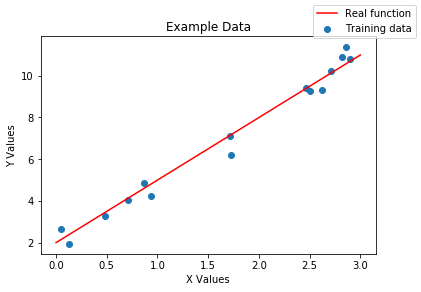

In [4]:
x_vals = np.linspace(0, 3, 2)
real_fn = 2 + 3 * x_vals

fig, ax = plt.subplots()
ax.scatter(predictors, targets, label='Training data')
ax.plot(x_vals, real_fn, 'red', label='Real function')
ax.set_title('Example Data')
ax.set_xlabel('X Values')
ax.set_ylabel('Y Values')
fig.legend()

## Define functions to perform gradient descent

In [5]:
def hypothesis(predictor, weights):
    return weights[0] + predictor * weights[1]

In [6]:
def error(predictors, weights, targets):
    return hypothesis(predictors, weights) - targets

In [7]:
def update_weights(weights, predictors, targets, learning_rate):
    temp_weights = np.zeros(2)
    num_predictors = len(predictors)
    # Use partial derivatives on each weight
    temp_weights[0] = weights[0] - learning_rate * ((1 / num_predictors) * np.sum(error(predictors, weights, targets)))
    temp_weights[1] = weights[1] - learning_rate * ((1 / num_predictors) * np.sum(error(predictors, weights, targets) * predictors))
    return temp_weights

In [8]:
def grad_desc(weights, predictors, targets, learning_rate, iterations):
    rmse = np.zeros(iterations)
    for iteration in range(iterations):
        mse = np.sum(np.power(error(predictors, weights, targets), 2)) / len(predictors)
        rmse[iteration] = np.sqrt(mse)
        weights = update_weights(weights, predictors, targets, learning_rate)
    return rmse, weights

## Predict weights using training data

In [9]:
# Y = weights[0] + weights[1] * predictor
weights = np.zeros(2)
iterations = 15
learning_rate = 0.1
rmse, weights = grad_desc(weights, predictors, targets, learning_rate, iterations)

Expected t0 value: 2, Predicted t0 value: 1.5687906092443247
Expected t1 value: 3, Predicted t1 value: 3.190566733631348


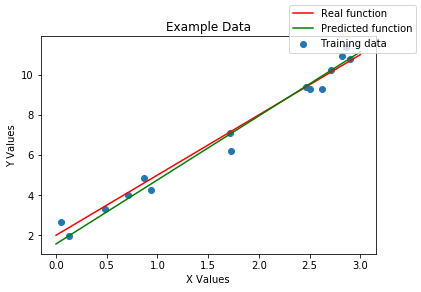

In [10]:
x_vals = np.linspace(0, 3, 2)
real_fn = 2 + 3 * x_vals
regression_fn = weights[0] + weights[1] * x_vals

fig, ax = plt.subplots()
ax.scatter(predictors, targets, label='Training data')
ax.plot(x_vals, real_fn, 'red', label='Real function')
ax.plot(x_vals, regression_fn, 'green', label='Predicted function')
ax.set_title('Example Data')
ax.set_xlabel('X Values')
ax.set_ylabel('Y Values')
fig.legend()

print(f'Expected t0 value: 2, Predicted t0 value: {weights[0]}')
print(f'Expected t1 value: 3, Predicted t1 value: {weights[1]}')

## Plot Root Mean Square Error of Gradient Descent
We plot the RMSE over each iteration of gradient descent to see how the model improves over time

Initial RMSE: 7.745389409210801
Final RMSE: 0.4607525815137977


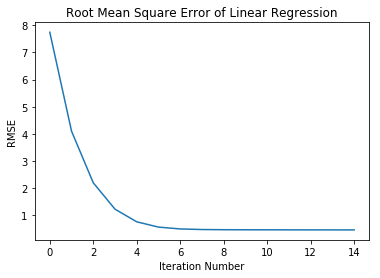

In [11]:
fig, ax = plt.subplots()
ax.plot(np.arange(iterations), rmse)
ax.set_title('Root Mean Square Error of Linear Regression')
ax.set_xlabel('Iteration Number')
ax.set_ylabel('RMSE')
print(f'Initial RMSE: {rmse[0]}')
print(f'Final RMSE: {rmse[-1]}')